<a href="https://colab.research.google.com/github/superti4r/learn_python/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1
Updated weights: [0, 0], bias: -1
No update
No update
Updated weights: [1, 1], bias: 0
Epoch 2
Updated weights: [1, 1], bias: -1
Updated weights: [1, 0], bias: -2
No update
Updated weights: [2, 1], bias: -1
Epoch 3
No update
Updated weights: [2, 0], bias: -2
Updated weights: [1, 0], bias: -3
Updated weights: [2, 1], bias: -2
Final weights: [2, 1], Final bias: -2
Akurasi: 75.00%


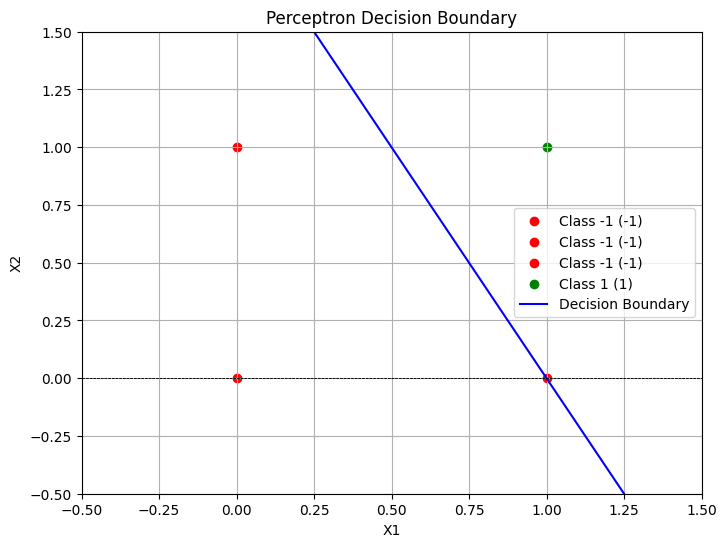

Prediksi untuk input (0, 0): -1
Prediksi untuk input (0, 1): -1
Prediksi untuk input (1, 0): 0
Prediksi untuk input (0.5, 0.5): -1


In [1]:
import matplotlib.pyplot as plt

def activation_function(y_in):
    """Fungsi aktivasi tiga nilai."""
    if y_in > 0:
        return 1
    elif 0 <= y_in <= 1:
        return 0
    else:
        return -1

def train_perceptron(data, learning_rate, epochs):
    """Melatih perceptron dengan data yang diberikan."""
    weights = [0, 0]  # w1, w2
    bias = 0

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}")
        for x1, x2, target in data:
            # Hitung input net
            y_in = bias + (weights[0] * x1 + weights[1] * x2)
            # Hitung output
            output = activation_function(y_in)

            # Update bobot dan bias jika terjadi error
            if output != target:
                weights[0] += learning_rate * target * x1
                weights[1] += learning_rate * target * x2
                bias += learning_rate * target
                print(f"Updated weights: {weights}, bias: {bias}")
            else:
                print("No update")

    return weights, bias

def calculate_accuracy(data, weights, bias):
    """Menghitung akurasi model."""
    correct_predictions = 0
    total_predictions = len(data)

    for x1, x2, target in data:
        y_in = bias + (weights[0] * x1 + weights[1] * x2)
        output = activation_function(y_in)
        if output == target:
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

def predict(weights, bias, test_data):
    """Melakukan prediksi untuk data uji."""
    predictions = []
    for x1, x2 in test_data:
        y_in = bias + (weights[0] * x1 + weights[1] * x2)
        output = activation_function(y_in)
        predictions.append(output)
    return predictions

def plot_decision_boundary(data, weights, bias):
    """Memvisualisasikan data dan batas keputusan."""
    plt.figure(figsize=(8, 6))
    for x1, x2, target in data:
        if target == 1:
            plt.scatter(x1, x2, color='green', label='Class 1 (1)' if 'Class' not in plt.gca().get_legend_handles_labels()[1] else "")
        elif target == -1:
            plt.scatter(x1, x2, color='red', label='Class -1 (-1)' if 'Class -1' not in plt.gca().get_legend_handles_labels()[1] else "")

    # Garis pemisah
    x = [-0.5, 1.5]
    y = [-(weights[0] * xi + bias) / weights[1] if weights[1] != 0 else None for xi in x]
    plt.plot(x, y, label='Decision Boundary', color='blue')

    # Setting plot
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Perceptron Decision Boundary")
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.show()

# Data input dan target
data = [
    [0, 0, -1],
    [0, 1, -1],
    [1, 0, -1],
    [1, 1, 1],
]

# Parameter pelatihan
learning_rate = 1
epochs = 3

# Melatih perceptron
final_weights, final_bias = train_perceptron(data, learning_rate, epochs)

# Menampilkan bobot dan bias akhir
print(f"Final weights: {final_weights}, Final bias: {final_bias}")

# Menghitung akurasi
accuracy = calculate_accuracy(data, final_weights, final_bias)
print(f"Akurasi: {accuracy:.2f}%")

# Memvisualisasikan hasil
plot_decision_boundary(data, final_weights, final_bias)

# Data uji
test_data = [
    [0, 0],
    [0, 1],
    [1, 0],
    [0.5, 0.5], # Contoh data baru
]

# Melakukan prediksi
predictions = predict(final_weights, final_bias, test_data)
for i, (x1, x2) in enumerate(test_data):
    print(f"Prediksi untuk input ({x1}, {x2}): {predictions[i]}")